In [74]:
import pandas as pd
import seaborn as sns
import numpy as np

In [114]:
house_data = pd.read_csv('data/kc_house_data_cleaned.csv')
house_data

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,3,0.0,1955,0.0,98178
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,3,400.0,1951,1991.0,98125
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,2,0.0,1933,0.0,98028
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,4,3,910.0,1965,0.0,98136
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,4,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,4,0.0,2009,0.0,98103
21593,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,4,0.0,2014,0.0,98146
21594,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,3,0.0,2009,0.0,98144
21595,21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,4,0.0,2004,0.0,98027


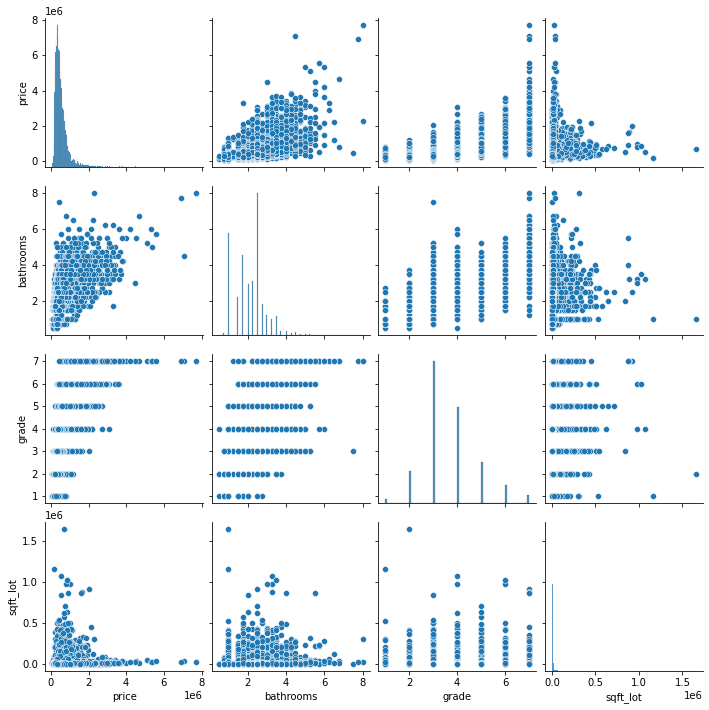

In [76]:
sns.pairplot(house_data[['price','bathrooms','grade','sqft_lot']])

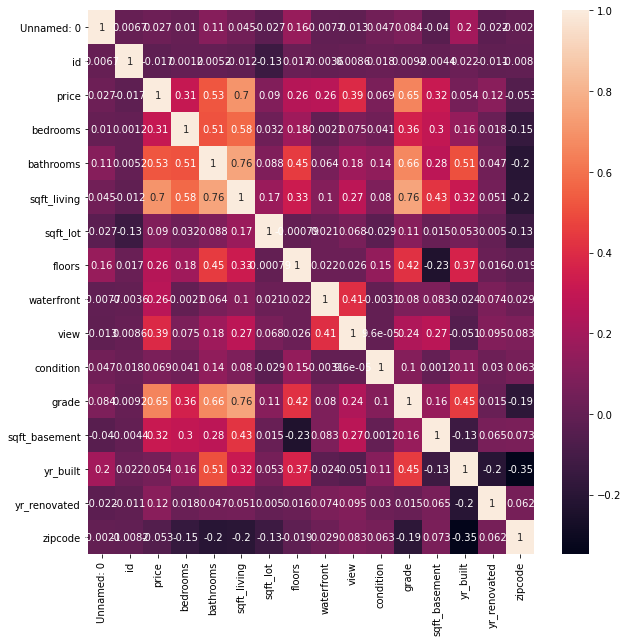

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(),annot=True)
plt.savefig('sqft_livig_x_price_by_grade.png')

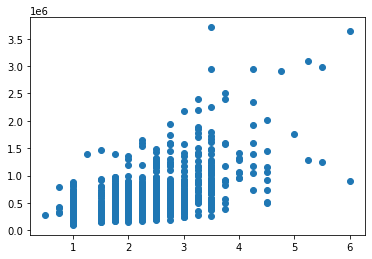

In [78]:
data = house_data.sample(1500)
plt.scatter(x=data['bathrooms'],y=data['price'])

In [79]:
house_data.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [80]:
features = ['bedrooms', 'bathrooms',  'sqft_living','sqft_lot',
       'sqft_lot', 'floors', 'waterfront', 'view','grade','condition']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house_data[features], house_data['price'], test_size = 0.2)

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [83]:
regressor.predict()
print(regressor.score(X_train,y_train))
print(regressor.score(X_test, y_test))

TypeError: predict() missing 1 required positional argument: 'X'

In [84]:
from itertools import combinations
sample_list = ['a','b','c']
r_score = []
comb_list = []
for n in range(len(features)):
    n+=1
    feature_list = (list(combinations(features, n)))
    for feature in feature_list:
        feature2 = list(feature)
        X_train, X_test, y_train, y_test = train_test_split(house_data[feature2], house_data['price'], test_size = 0.2)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r_score.append(regressor.score(X_test,y_test))
        comb_list.append(feature)

In [85]:
max_value = max(r_score)

max_index = r_score.index(max_value)
comb_list[max_index]

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'grade')

In [86]:
max_value

0.62037872311273

Going to plot multiple distributions of price based off number of bathrooms (mostly for practice but we'll see if there is any useful information!)

In [87]:
house_data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function

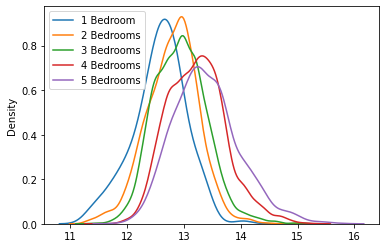

In [88]:
target_0 = house_data.loc[house_data['bedrooms'] == 1]
target_1 = house_data.loc[house_data['bedrooms'] == 2]
target_2 = house_data.loc[house_data['bedrooms'] == 3]
target_3 = house_data.loc[house_data['bedrooms'] == 4]
target_4 = house_data.loc[house_data['bedrooms'] == 5]

sns.distplot(np.log(target_0[['price']]), hist=False, label='1 Bedroom')
sns.distplot(np.log(target_1[['price']]), hist=False, label='2 Bedrooms')
sns.distplot(np.log(target_2[['price']]), hist=False, label='3 Bedrooms')
sns.distplot(np.log(target_3[['price']]), hist=False, label='4 Bedrooms')
sns.distplot(np.log(target_4[['price']]), hist=False, label='5 Bedrooms')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.show()

In [89]:
np.exp(13)

442413.3920089205

The mean for conditions is a bit unusual.  The mean price for fair is below poor, I will make a graph to explore that relationship further

In [90]:
house_data.groupby(['condition'])['price'].mean()

condition
0    341067.241379
1    328178.758824
2    521374.450414
3    542173.057347
4    612577.742504
Name: price, dtype: float64

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2589: RuntimeWarning:

Mean of empty slice.

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

No handles with labels found to put in legend.


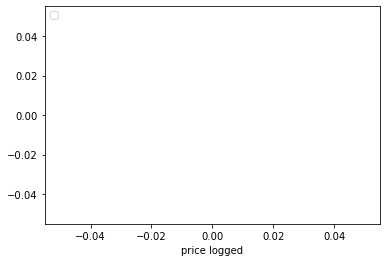

In [91]:
target_0 = house_data.loc[house_data['condition'] == 'Average']
target_1 = house_data.loc[house_data['condition'] == 'Fair']
target_2 = house_data.loc[house_data['condition'] == 'Good']
target_3 = house_data.loc[house_data['condition'] == 'Poor']
target_4 = house_data.loc[house_data['condition'] == 'Very Good']

sns.distplot(np.log(target_0[['price']]), hist=False, label='Average')
sns.distplot(np.log(target_1[['price']]), hist=False, label='Fair')
sns.distplot(np.log(target_2[['price']]), hist=False, label='Good')
sns.distplot(np.log(target_3[['price']]), hist=False, label='Poor')
sns.distplot(np.log(target_4[['price']]), hist=False, label='Very Good')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.xlabel('price logged')
plt.show()


In [92]:
house_data.groupby(['condition'])['price'].mean()

condition
0    341067.241379
1    328178.758824
2    521374.450414
3    542173.057347
4    612577.742504
Name: price, dtype: float64

Based off this graph we can see that although the mean price is great for poor over fair, poor contains a larger amount of cheaper houses, which can reflected by the median. Average and Good also seem to be interchangable.

In [93]:
house_data_hot = pd.read_csv('data/kc_house_data_hot.csv')
house_data_hot

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.preprocessing import OneHotEncoder
X_train, X_test, y_train, y_test = train_test_split(house_data_hot[features], house_data_hot['price'], test_size = 0.2)

# one hot encoding linear regression for later!

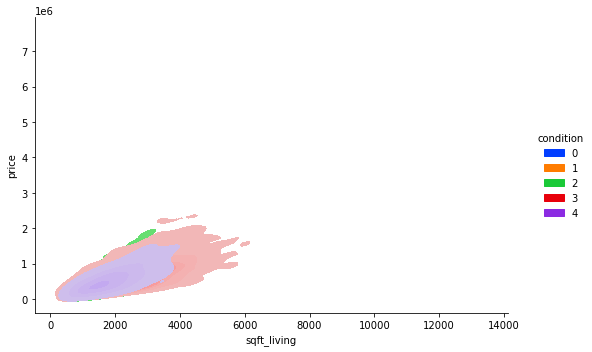

In [95]:
sns.displot(data=house_data, x='sqft_living',y='price', hue='condition', 
            kind='kde', fill=True,palette=sns.color_palette('bright')[:5], 
            height=5, aspect=1.5)

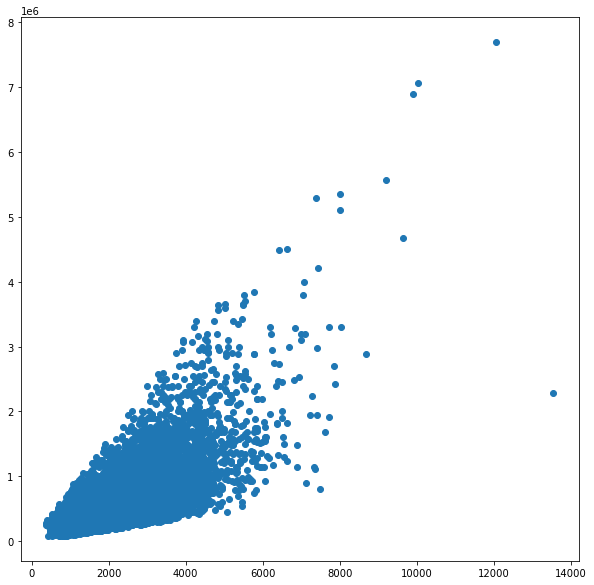

In [96]:

plt.figure(figsize=(10, 10))
plt.scatter(house_data.sqft_living,house_data.price)
plt.show()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(house_data[['sqft_living']], house_data['price'], test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test, y_test))

0.4964375446196033
0.47935630547012764


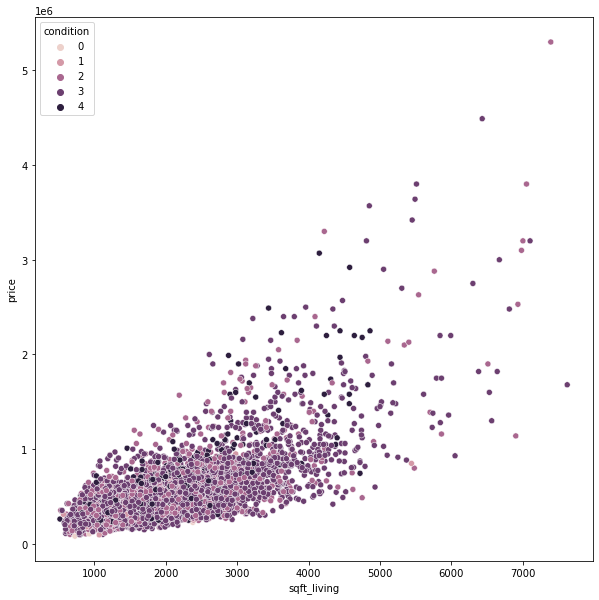

In [98]:
data = house_data.sample(5000)
m= regressor.coef_
b= regressor.intercept_
x = np.arange(house_data.sqft_living.min(), house_data.sqft_living.max(), 1000, dtype=int)
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'sqft_living',y = 'price',data=data,hue = 'condition')
#plt.plot(x,m*x+b)
plt.show()

<Figure size 1440x1440 with 0 Axes>

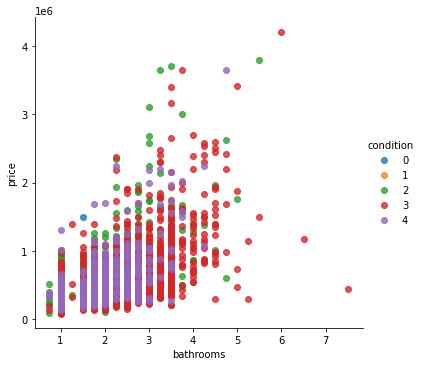

In [99]:
data = house_data.sample(5000)
m= regressor.coef_
b= regressor.intercept_
x = np.arange(house_data.sqft_living.min(), house_data.sqft_living.max(), 1000, dtype=int)
plt.figure(figsize=(20, 20))
sns.lmplot(x = 'bathrooms',y = 'price',data=data,hue = 'condition', fit_reg=False)
#plt.plot(x,m*x+b)
plt.show()

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function

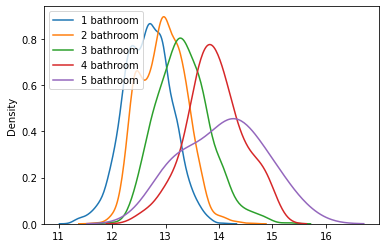

In [100]:
target_0 = house_data.loc[house_data['bathrooms'] == 1]
target_1 = house_data.loc[house_data['bathrooms'] == 2]
target_2 = house_data.loc[house_data['bathrooms'] == 3]
target_3 = house_data.loc[house_data['bathrooms'] == 4]
target_4 = house_data.loc[house_data['bathrooms'] == 5]

sns.distplot(np.log(target_0[['price']]), hist=False, label='1 bathroom')
sns.distplot(np.log(target_1[['price']]), hist=False, label='2 bathroom')
sns.distplot(np.log(target_2[['price']]), hist=False, label='3 bathroom')
sns.distplot(np.log(target_3[['price']]), hist=False, label='4 bathroom')
sns.distplot(np.log(target_4[['price']]), hist=False, label='5 bathroom')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.show()

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function

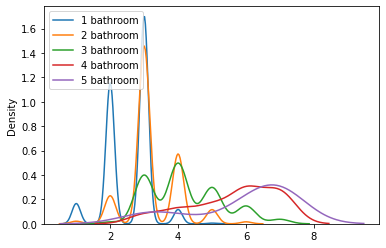

In [101]:
target_0 = house_data.loc[house_data['bathrooms'] == 1]
target_1 = house_data.loc[house_data['bathrooms'] == 2]
target_2 = house_data.loc[house_data['bathrooms'] == 3]
target_3 = house_data.loc[house_data['bathrooms'] == 4]
target_4 = house_data.loc[house_data['bathrooms'] == 5]

sns.distplot((target_0[['grade']]), hist=False, label='1 bathroom')
sns.distplot((target_1[['grade']]), hist=False, label='2 bathroom')
sns.distplot((target_2[['grade']]), hist=False, label='3 bathroom')
sns.distplot((target_3[['grade']]), hist=False, label='4 bathroom')
sns.distplot((target_4[['grade']]), hist=False, label='5 bathroom')

#sns.distplot((target_0[['price']]), hist=False, rug=True)
plt.legend(loc="upper left")
plt.show()

In [102]:
house_data.grade.unique()

array([3, 2, 4, 7, 5, 1, 6])

<Figure size 1440x1440 with 0 Axes>

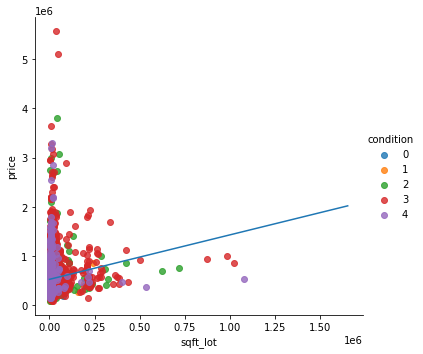

In [103]:
X_train, X_test, y_train, y_test = train_test_split(house_data[['sqft_lot']], house_data['price'], test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
data = house_data.sample(5000)
m= regressor.coef_
b= regressor.intercept_
x = np.arange(house_data.sqft_lot.min(), house_data.sqft_lot.max(), 1000, dtype=int)
plt.figure(figsize=(20, 20))
sns.lmplot(x = 'sqft_lot',y = 'price',data=data,hue = 'condition', fit_reg=False)
plt.plot(x,m*x+b)
plt.show()

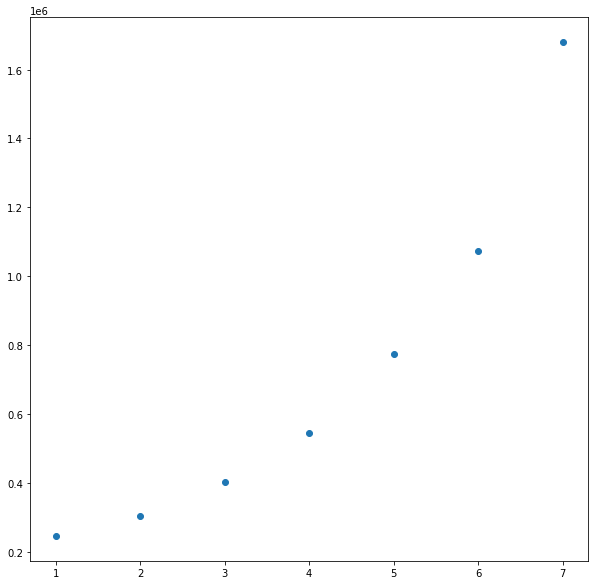

In [104]:
import math
grouped = house_data.groupby(['grade'])['price'].mean()
data = house_data.sample(5000)
plt.figure(figsize=(10, 10))
plt.scatter(grouped.index,grouped)
#plt.plot(x,((m**x)*b))
plt.show()

In [105]:
features2 = ['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'condition']
X_train, X_test, y_train, y_test = train_test_split(house_data[features2], house_data['price'], test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test, y_test))

0.58702277168377
0.5821261883439051


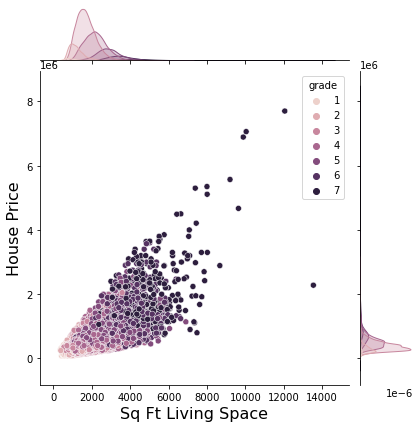

In [106]:
p=sns.jointplot(x = 'sqft_living', y = 'price', hue = 'grade', data = house_data)
p.set_axis_labels('Sq Ft Living Space', 'House Price', fontsize=16)
plt.savefig('sqft_livig_x_price_by_grade.png')

In [107]:
house_data_hot.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', '98002',
       '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98103', '98105', '98106', '98107', '98108', '98109', '98112', '98115',
       '98116', '98117', '98118', '98119', '98122', '98125', '98126', '98133',
       '98136', '98144', '98146', '98148', '98155', '98166', '98168', '98177',
       '98178', '98188', '98198', '98199'],
      dtype='object')

In [120]:
house_data_hot.columns
features3 = ['bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'condition','98002',
       '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98103', '98105', '98106', '98107', '98108', '98109', '98112', '98115',
       '98116', '98117', '98118', '98119', '98122', '98125', '98126', '98133',
       '98136', '98144', '98146', '98148', '98155', '98166', '98168', '98177',
       '98178', '98188', '98198', '98199']
X_train, X_test, y_train, y_test = train_test_split(house_data_hot[features3], house_data_hot['price'], test_size = 0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test, y_test))
list(zip(features3,regressor.coef_))

0.7917280310498394
0.7928251439073609


[('bathrooms', -14007.764544722117),
 ('sqft_living', 191.74440838561867),
 ('sqft_lot', 0.267117777771432),
 ('waterfront', 655760.7164691555),
 ('view', 68618.63157692831),
 ('grade', 49321.78658847374),
 ('condition', 4315.009988060599),
 ('98002', 51676.35853321897),
 ('98003', -5016.908769796981),
 ('98004', 829781.8262995209),
 ('98005', 341366.1903135121),
 ('98006', 293567.9729496391),
 ('98007', 265214.8086831436),
 ('98008', 264035.7778275596),
 ('98010', 90495.85101238149),
 ('98011', 131681.9096161011),
 ('98014', 111144.87672821607),
 ('98019', 92670.96838713821),
 ('98022', 17268.631004986175),
 ('98023', -19526.1670966625),
 ('98024', 177132.9886560811),
 ('98027', 177716.67462967898),
 ('98028', 125839.05680064583),
 ('98029', 219417.1395017848),
 ('98030', 12299.091072134324),
 ('98031', 20836.369555225305),
 ('98032', 16406.983043672342),
 ('98033', 388467.9545754156),
 ('98034', 208760.24068698386),
 ('98038', 37489.99974939664),
 ('98039', 1334106.863481921),
 ('980

In [109]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = y_test,y = ,data=data,hue = 'condition')
#plt.plot(x,m*x+b)
plt.show()

SyntaxError: invalid syntax (<ipython-input-109-79c0bb4d5014>, line 2)

[498619.20844577]
329950.0


ValueError: operands could not be broadcast together with shapes (76,) (549,) 

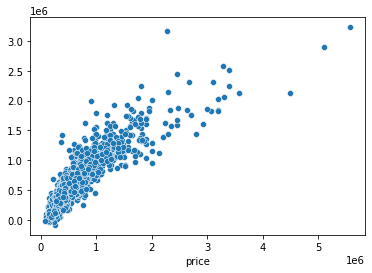

In [110]:
print(regressor.predict([X_test.iloc[4]]))
print((y_test.iloc[4]))
graph_test = []
graph_results = []

prediction = regressor.predict(X_test)
print(len(x))
print(len(y))
#plt.plot(x,y)

In [111]:
X_test.iloc[0]

bathrooms         1.0
sqft_living     760.0
sqft_lot       3000.0
waterfront        0.0
view              0.0
                ...  
98177             0.0
98178             0.0
98188             0.0
98198             0.0
98199             0.0
Name: 18765, Length: 76, dtype: float64

In [116]:
import plotly.express as px 
import psutil

In [119]:
fig = px.scatter(x = y_test, y= prediction , trendline = 'ols',
           labels = {'x': 'Actual Price Values',
     'y': 'Predicted Price Values',
                    },
          title= 'Actual vs Predicted Price Values',
           trendline_color_override = 'red'
          )
fig.show()